In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


In [3]:
file_path = "Student_Performance.csv"   # put your file path here
df = pd.read_csv(file_path)

df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Explore Dataset
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nDuplicates:", df.duplicated().sum())
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape: (10000, 6)

Data types:
 Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Duplicates: 127

Missing values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
# Clean Data (drop duplicates)
df = df.drop_duplicates().reset_index(drop=True)
print("After dropping duplicates:", df.shape)


After dropping duplicates: (9873, 6)


In [6]:
#  Encode Categorical Variables
df['Extracurricular_Encoded'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})
df[['Extracurricular Activities','Extracurricular_Encoded']].head()


,Extracurricular Activities,Extracurricular_Encoded
0,Yes,1
1,No,0
2,Yes,1
3,Yes,1
4,No,0


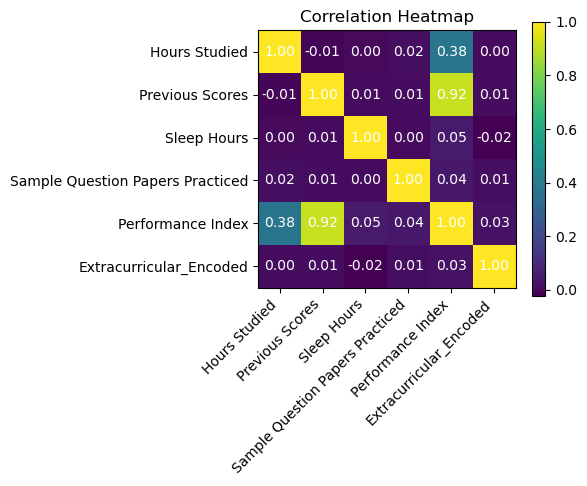

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Encoded
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332,0.004899
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135,0.009534
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352,-0.024008
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436,0.013839
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000,0.026075
Extracurricular_Encoded,0.004899,0.009534,-0.024008,0.013839,0.026075,1.000000


In [7]:
#  Correlation Heatmap
numeric_cols = ['Hours Studied','Previous Scores','Sleep Hours',
                'Sample Question Papers Practiced','Performance Index','Extracurricular_Encoded']

corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)

for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='white')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

corr


In [8]:
# Prepare X and y (add intercept column for regression)
X = df[['Hours Studied','Previous Scores','Extracurricular_Encoded',
        'Sleep Hours','Sample Question Papers Practiced']].copy()
y = df['Performance Index'].values.reshape(-1,1)

# Add intercept column
X.insert(0,'Intercept',1)
X_mat = X.values


In [9]:
# Train-Test Split (80/20)
np.random.seed(42)
n = X_mat.shape[0]
indices = np.random.permutation(n)
train_size = int(0.8*n)

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, X_test = X_mat[train_idx], X_mat[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (7898, 6) Test shape: (1975, 6)


In [15]:
# Fit Linear Regression (OLS closed form)
XtX = X_train.T @ X_train
XtX_inv = np.linalg.inv(XtX + 1e-8*np.eye(XtX.shape[0]))   # safe inverse
beta = XtX_inv @ X_train.T @ y_train

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': beta.flatten()
})
coef_df


,Feature,Coefficient
0,Intercept,-34.080953
1,Hours Studied,2.851348
2,Previous Scores,1.018202
3,Extracurricular_Encoded,0.662608
4,Sleep Hours,0.482008
5,Sample Question Papers Practiced,0.192846


In [16]:
# Predictions & Evaluation
y_pred = X_test @ beta

mse = np.mean((y_test - y_pred)**2)
rmse = sqrt(mse)
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - ss_res/ss_tot

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MSE: 4.061359043831149
RMSE: 2.015281380807938
R-squared: 0.9888965222215018


In [17]:
#  Sample Predictions
comparison = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten(),
    'Error': (y_test - y_pred).flatten()
})
comparison.sample(10, random_state=42)


,Actual,Predicted,Error
1825,79.0,79.064893,-0.064893
1735,56.0,52.912748,3.087252
678,66.0,68.723886,-2.723886
351,49.0,51.500089,-2.500089
1791,60.0,61.489259,-1.489259
610,32.0,33.752003,-1.752003
70,37.0,34.424937,2.575063
1124,79.0,79.261090,-0.261090
56,15.0,15.144107,-0.144107
900,53.0,50.213333,2.786667


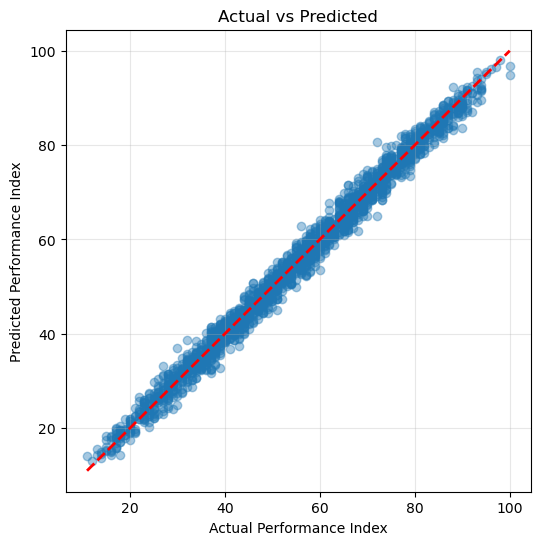

In [18]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # ideal line
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.grid(alpha=0.3)
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("student_performance.csv")  # put your actual filename here

# 1. Load dataset (replace with your actual CSV or dataframe if already loaded)
# Example: df = pd.read_csv("student_performance.csv")
# If you already have df in your notebook, just skip this step

# Let's assume your dataset is named df
# (Make sure to set the correct target column name, e.g., 'PerformanceIndex')

target_column = "Performance Index"  # change if different
X = df.drop(columns=[target_column])   # features
y = df[target_column]                  # target

# 2. Apply Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Train Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# 4. Get coefficients
coefficients = pd.Series(model.coef_, index=X.columns)

# 5. Plot coefficients
plt.figure(figsize=(8,5))
coefficients.plot(kind='bar', color='teal')
plt.title("Regression Coefficients (after Min-Max Normalization)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.grid(alpha=0.3)
plt.show()


ValueError: could not convert string to float: 'Yes'

In [3]:
# See all column names
print(df.columns.tolist())


['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
